$Step-1$

**import the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Data1 : here we will take the data which follows normal distribution

- data2 : based on above data we will create a another data by multiplying some value

- so that both data sets have multicollinearity

- the both datasets have some covariance

- then we will apply PCA

- will create two new PCs , will check the Covariance matrix again

- so the PCs covariance should be zero

$Step-2$

**create the dataframe**

In [2]:
# we will create a data having some multicollinearity
x=np.random.normal(200,10,500)  # mean =200 , std=10 , no of observations=500
x.mean()

200.16054790367133

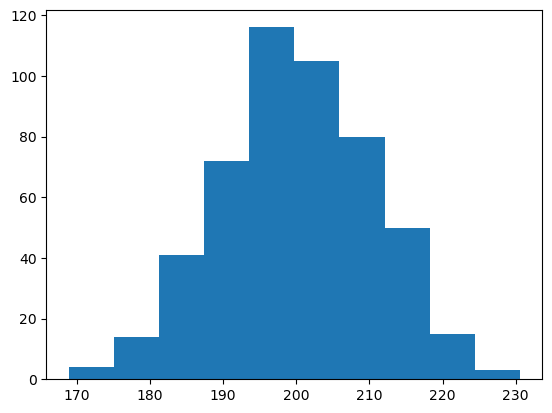

In [3]:
plt.hist(x)
plt.show()

In [4]:
x

array([187.49609718, 191.14615441, 212.6064387 , 189.2922544 ,
       211.52371227, 190.6761993 , 184.64449539, 194.01391916,
       194.8842484 , 201.63427611, 183.60990341, 201.25496909,
       193.73810531, 219.17095625, 199.24275178, 205.89346618,
       192.44915647, 200.45354808, 203.11527269, 195.13529823,
       210.52017937, 210.36533515, 177.29281815, 206.44958273,
       195.34946458, 205.70562167, 210.49689611, 207.52249449,
       199.20797141, 186.15368723, 195.57680788, 194.61598038,
       191.28519917, 191.5895002 , 194.33019435, 199.24650847,
       207.48964616, 203.80138952, 223.00351322, 188.33141617,
       205.59848996, 213.90614871, 196.85307447, 196.98712123,
       196.32650132, 186.04358354, 203.01762313, 204.74264429,
       190.83896515, 206.58068211, 204.66601553, 196.00148078,
       198.39855749, 209.14683853, 199.3648698 , 206.38330912,
       193.02258687, 202.68493864, 204.59436437, 195.09678655,
       213.90345017, 195.76708661, 196.68273371, 197.06

In [5]:
# create a data y , should be correlate to x
y=0.5*x+np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print('mean:',y.mean())
print('std:',y.std())

mean: 110.06159080803118
std: 6.781234004658399


In [6]:
y

array([108.12008684,  99.085879  , 119.4115238 , 108.03560318,
       119.85703625, 113.12326518, 109.27625145, 107.46619079,
       104.75052985, 107.18761569, 101.25557394, 117.90975048,
       107.02102693, 110.68234302, 111.97429046, 112.42035596,
       109.79876815, 114.55178087, 125.09923378, 107.33090278,
       105.21478802, 121.80602842,  85.59505069, 119.12044111,
       112.30409312, 120.77322625, 116.94860598, 112.40074785,
       114.71595822, 108.86351396,  97.57105748, 113.4233612 ,
        99.83978018, 108.19523964, 106.24952364, 110.29781336,
       116.49802983, 112.87920622, 124.31869816, 101.33495202,
       111.37315528, 110.94096909, 113.10850617, 110.94374398,
       106.8203848 , 105.27570501, 109.57247236, 119.27331014,
       102.30046675, 112.77904854, 111.18401347, 110.80561218,
       113.62452554, 116.16823375, 112.11591224, 115.79369151,
       107.88498827, 109.51782919, 120.62134904, 108.39449753,
       114.87715135, 108.08307599, 117.59845371, 109.95

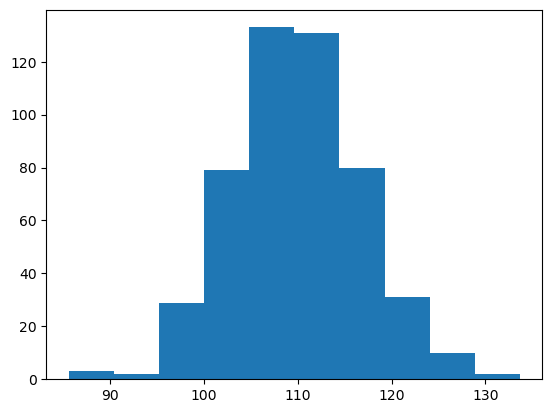

In [7]:
plt.hist(y)
plt.show()

**perform scatter plot**

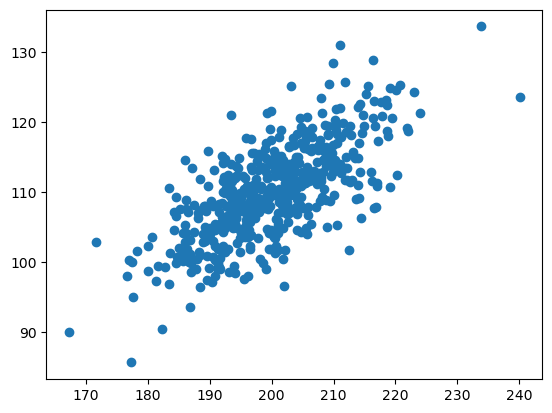

In [8]:
plt.scatter(x,y)
plt.show()

**observations**

- Both points are correalted each other
- Both points are not orthogonal to each other
- Perform covariance matrix for better idea

$step-4$

**covariance matrix**

In [36]:
cov_mat=np.cov(x,y)
cov_mat

#[[variance(x),cov(x)],
#[cov(y), variance(y)]]

array([[93.13499585, 45.76678383],
       [45.76678383, 46.0772892 ]])

In [37]:
# variance= E (x-u)/n
np.sum(np.square(x-np.mean(x)))/499

93.13499584515246

In [38]:
# cov = (x-x^)(y-y^)/n
a=x-np.mean(x)
b=y-np.mean(y)
np.sum(a*b)/499

45.766783828423

<Axes: >

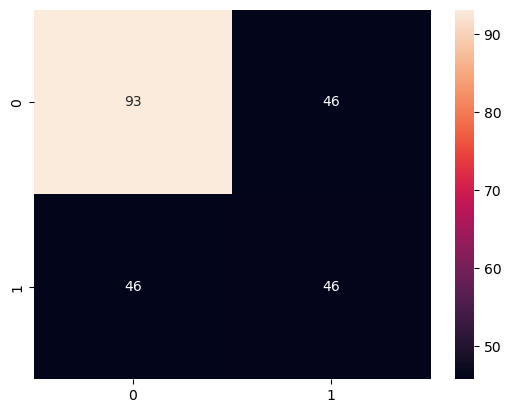

In [39]:
#import seaborn as sns
sns.heatmap(cov_mat,annot=True)

$Step−5$ 

**Perform the PCA**

- to reduce the dimensions

- to avoid multi collinearity

- to make data has orthogonal


**Will calculate eigen vectors and eigen values of covariance matrix**

In [13]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [14]:
eig_vectors

array([[ 0.85358646, -0.5209512 ],
       [ 0.5209512 ,  0.85358646]])

In [15]:
eig_values

array([121.06685998,  18.14542507])

**observations**

- we have two data samples x and y , so we have 2x2 covariance matrix

- when we apply eigen values and eigen vectors on 2x2 cov matrix will get **two eigen values and two eigen vectors**

- eigen vectors will give the indication to **which direction data should flow**

- if you see eigen vectors the magnitude is same but the direction is different

- the dot product of eigen values either one or zero , indicates **orthogonality**

- eigen values represents how much data shouls flow along that particular direction

**Check point-1**

- perform the dot product of two eigen vectors

- cos90 is zero

- we are expecting dot product of two eigen vectors is zero

- dot product means cos

- cross product means sin

- dot product : cosine similarity

In [16]:
v1=eig_vectors[0]
v2=eig_vectors[1]

In [17]:
np.dot(v1,v2)

0.0

**Check point-2**

- data variance along each direction

- percentage of data flows in each direction

- we will use eigen values , each eigen value divided by sum of the eigen values

In [18]:
eig_values

array([121.06685998,  18.14542507])

In [40]:
(121)/(121+18) , (18)/(121+18)

(0.8705035971223022, 0.12949640287769784)

In [20]:
print('the variance percentage:',eig_values[0]*100/sum(eig_values))
print('the variance percentage:',eig_values[1]*100/sum(eig_values))

the variance percentage: 86.96564382424582
the variance percentage: 13.034356175754196


$step-6$ 

**Create a new Pc's data**

new data = old data * eigen vectors

In [21]:
np.vstack([x,y]).T

array([[187.49609718, 108.12008684],
       [191.14615441,  99.085879  ],
       [212.6064387 , 119.4115238 ],
       [189.2922544 , 108.03560318],
       [211.52371227, 119.85703625],
       [190.6761993 , 113.12326518],
       [184.64449539, 109.27625145],
       [194.01391916, 107.46619079],
       [194.8842484 , 104.75052985],
       [201.63427611, 107.18761569],
       [183.60990341, 101.25557394],
       [201.25496909, 117.90975048],
       [193.73810531, 107.02102693],
       [219.17095625, 110.68234302],
       [199.24275178, 111.97429046],
       [205.89346618, 112.42035596],
       [192.44915647, 109.79876815],
       [200.45354808, 114.55178087],
       [203.11527269, 125.09923378],
       [195.13529823, 107.33090278],
       [210.52017937, 105.21478802],
       [210.36533515, 121.80602842],
       [177.29281815,  85.59505069],
       [206.44958273, 119.12044111],
       [195.34946458, 112.30409312],
       [205.70562167, 120.77322625],
       [210.49689611, 116.94860598],
 

In [22]:
z=np.vstack([x,y]).T
# stacking means together
# vertically stacking
# T= transpose of the data
# x , y
z

array([[187.49609718, 108.12008684],
       [191.14615441,  99.085879  ],
       [212.6064387 , 119.4115238 ],
       [189.2922544 , 108.03560318],
       [211.52371227, 119.85703625],
       [190.6761993 , 113.12326518],
       [184.64449539, 109.27625145],
       [194.01391916, 107.46619079],
       [194.8842484 , 104.75052985],
       [201.63427611, 107.18761569],
       [183.60990341, 101.25557394],
       [201.25496909, 117.90975048],
       [193.73810531, 107.02102693],
       [219.17095625, 110.68234302],
       [199.24275178, 111.97429046],
       [205.89346618, 112.42035596],
       [192.44915647, 109.79876815],
       [200.45354808, 114.55178087],
       [203.11527269, 125.09923378],
       [195.13529823, 107.33090278],
       [210.52017937, 105.21478802],
       [210.36533515, 121.80602842],
       [177.29281815,  85.59505069],
       [206.44958273, 119.12044111],
       [195.34946458, 112.30409312],
       [205.70562167, 120.77322625],
       [210.49689611, 116.94860598],
 

In [23]:
new_data=np.dot(z,eig_vectors)
new_data

array([[ 2.16369419e+02, -5.38647493e+00],
       [ 2.14778677e+02, -1.49994541e+01],
       [ 2.43685554e+02, -8.82951981e+00],
       [ 2.17858583e+02, -6.39429929e+00],
       [ 2.42993444e+02, -7.88518878e+00],
       [ 2.21690323e+02, -2.77250766e+00],
       [ 2.14537636e+02, -2.91404309e+00],
       [ 2.21592296e+02, -9.34009893e+00],
       [ 2.20920470e+02, -1.21115494e+01],
       [ 2.27951805e+02, -1.35477210e+01],
       [ 2.09476140e+02, -9.22141288e+00],
       [ 2.33213743e+02, -4.19785145e+00],
       [ 2.21124956e+02, -9.57639922e+00],
       [ 2.44741460e+02, -1.97004236e+01],
       [ 2.28404056e+02, -8.21601273e+00],
       [ 2.34313395e+02, -1.12999549e+01],
       [ 2.21471794e+02, -6.53387748e+00],
       [ 2.30780322e+02, -6.64666760e+00],
       [ 2.38547043e+02,  9.69866758e-01],
       [ 2.22479011e+02, -1.00397627e+01],
       [ 2.34508945e+02, -1.98608220e+01],
       [ 2.43019999e+02, -5.61809749e+00],
       [ 1.95925594e+02, -1.92981303e+01],
       [ 2.

In [24]:
new_data=np.dot(z,eig_vectors)
new_data=pd.DataFrame(new_data,columns=['PC1','PC2'])
new_data
# under these two pc2 we will select pc1
# then ML model will devop on pc1

,PC1,PC2
0,216.369419,-5.386475
1,214.778677,-14.999454
2,243.685554,-8.829520
3,217.858583,-6.394299
4,242.993444,-7.885189
...,...,...
495,227.958656,-10.771238
496,217.799827,-13.569251
497,234.390186,-23.975780
498,213.437117,-11.929887


$Step−7$

- Check point-3: **Covariance of the new data**

In [25]:
pc1=new_data['PC1'].values
pc2=new_data['PC2'].values
np.cov(pc1,pc2)
# 1.70872001/10000000000000000

array([[ 1.21066860e+02, -1.30717080e-14],
       [-1.30717080e-14,  1.81454251e+01]])

$Step-8$

- **Scater plot of new pcs data**

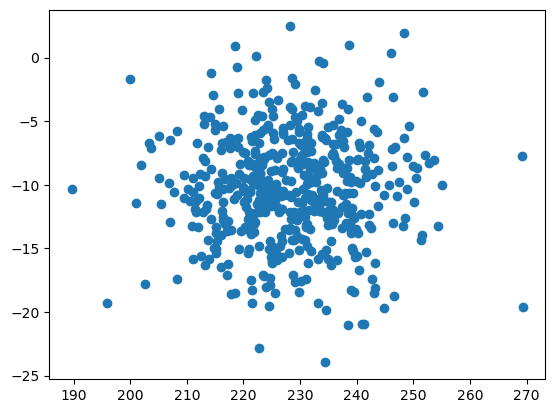

In [26]:
plt.scatter(pc1,pc2)

**3suitcases**

- normal complete numerical without scaling
- encode and scaled
- pca

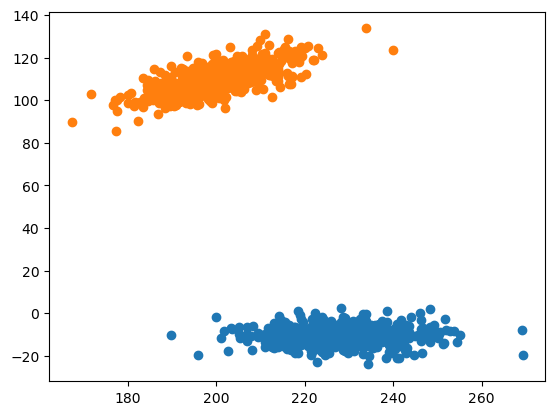

In [27]:
plt.scatter(new_data['PC1'],new_data['PC2']) # Blue no correlation
plt.scatter(x,y) # Orange # Correlation
plt.show()